<a href="https://colab.research.google.com/github/sarah-whitin/pytorch_tutorial/blob/main/basic_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

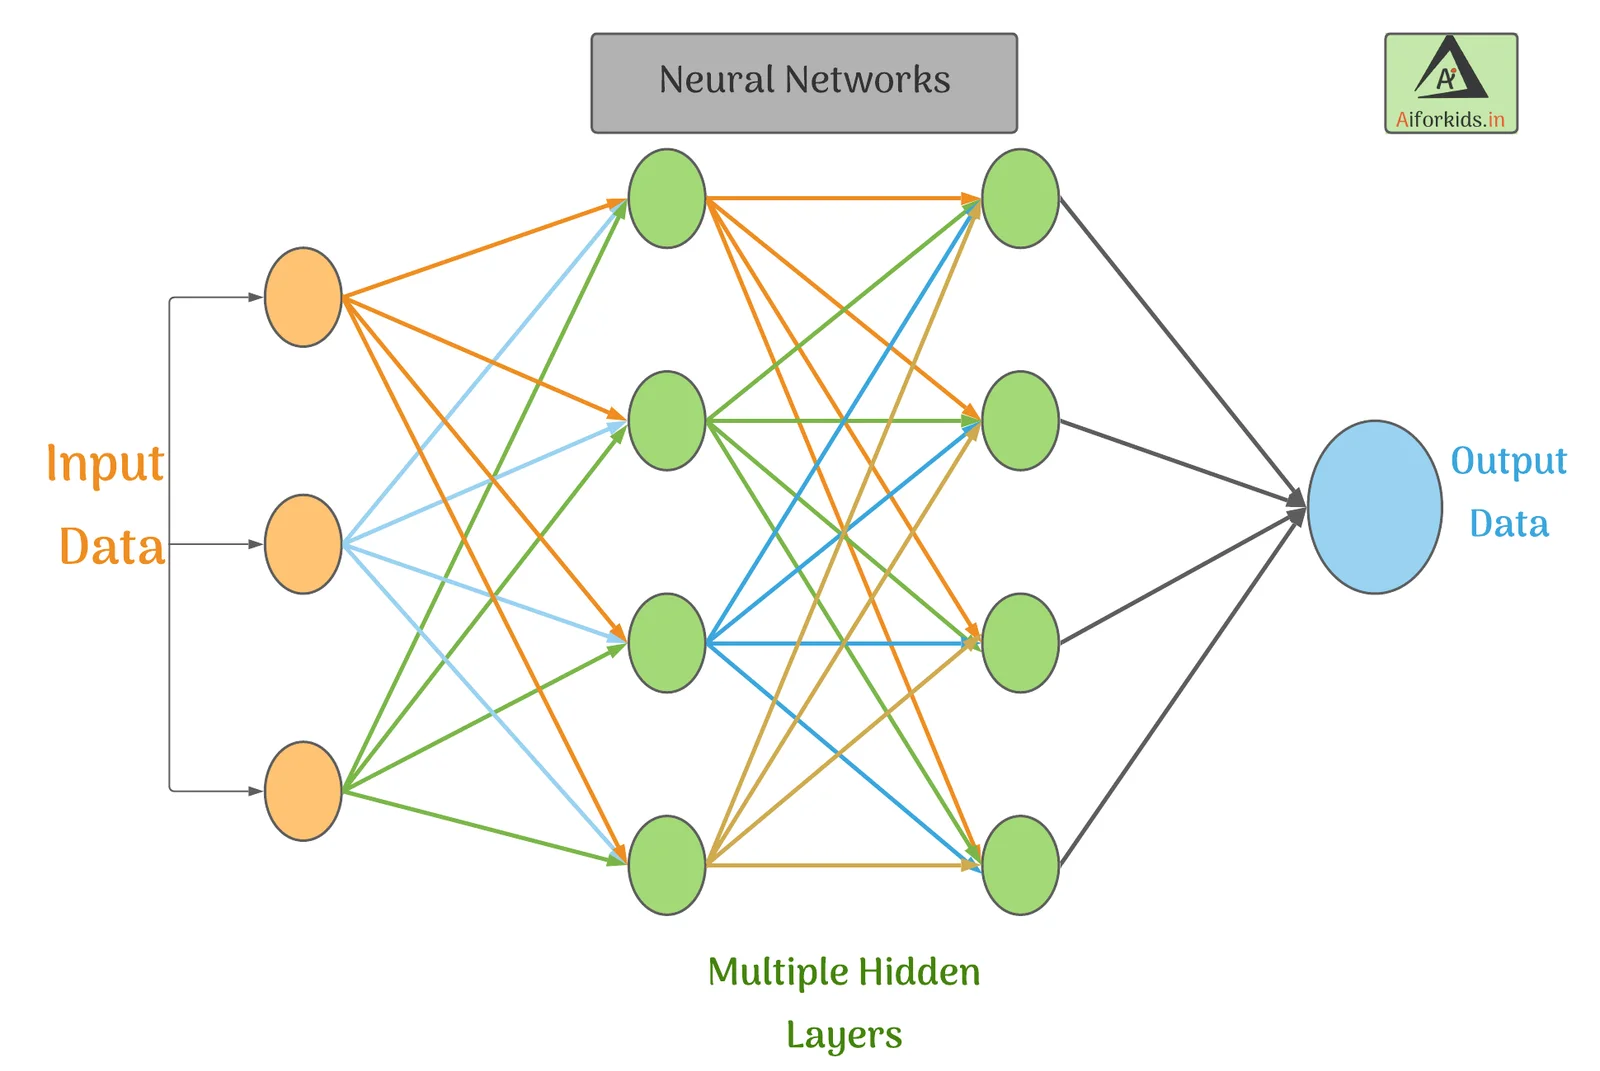

* can have many hidden layers
* may have many "dots" for the output layer
* using iris data sets

In [1]:
import torch
import torch.nn as nn # neural network package
import torch.nn.functional as F # allow us to move our data forward on our function

In [5]:
# Create a Model Class that inherits nn.Module
# using object oriented programming
class Model(nn.Module):
  # Input layer (4 features of the flower)
  # --> Hidden Layer1 (number of nueron) -- H2 (n)
  # --> output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features = 3):
    super().__init__() # instaniate our module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x)) # rectified linear unit -- if less than zero, call it zero
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [6]:
# create random seed
torch.manual_seed(41)

# create an instance of model
model = Model()